# Quickstart: Testing Your Setup

This notebook helps you verify that everything is set up correctly and demonstrates the basic workflow.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Basic imports successful")

Matplotlib is building the font cache; this may take a moment.


✓ Basic imports successful


## 1. Test Baseline Recommenders

In [2]:
from src.models.baselines import RandomRecommender, PopularityRecommender

# Create synthetic interactions
n_users, n_items = 100, 500
interactions = [
    (0, 10, 1.0),
    (0, 20, 1.0),
    (1, 10, 1.0),
    (1, 30, 1.0),
    (2, 10, 1.0),
    (2, 40, 1.0),
]

# Test random recommender
random_rec = RandomRecommender(n_items, seed=42)
print("Random Recommender:")
print(f"  Recommendations: {random_rec.recommend(user_id=0, k=5)}")

# Test popularity recommender
pop_rec = PopularityRecommender(n_items)
pop_rec.fit(interactions)
print("\nPopularity Recommender:")
print(f"  Recommendations: {pop_rec.recommend(user_id=0, k=5)}")
print("  (Item 10 should be first - it's the most popular)")

print("\n✓ Baseline recommenders working!")

Random Recommender:
  Recommendations: [361, 73, 374, 155, 104]

Popularity Recommender:
  Recommendations: [10, 20, 30, 40, 0]
  (Item 10 should be first - it's the most popular)

✓ Baseline recommenders working!


## 2. Test Epsilon-Greedy Bandit

In [3]:
from src.models.bandits.epsilon_greedy import simulate_bandit

# Run bandit simulation
results = simulate_bandit(
    n_items=50,
    n_steps=1000,
    epsilon=0.2,
    epsilon_decay=0.995,
    seed=42
)

bandit = results['bandit']
stats = results['final_stats']

print("Epsilon-Greedy Bandit Simulation:")
print(f"  Total reward: {stats['total_reward']:.1f}")
print(f"  Average reward: {stats['avg_reward']:.4f}")
print(f"  Exploration rate: {stats['exploration_rate']:.2%}")
print(f"  Items tried: {stats['items_tried']} / {bandit.n_items}")

print("\n✓ Epsilon-Greedy bandit working!")

Epsilon-Greedy Bandit Simulation:
  Total reward: 405.0
  Average reward: 0.4050
  Exploration rate: 4.20%
  Items tried: 31 / 50

✓ Epsilon-Greedy bandit working!


## 3. Visualize Learning

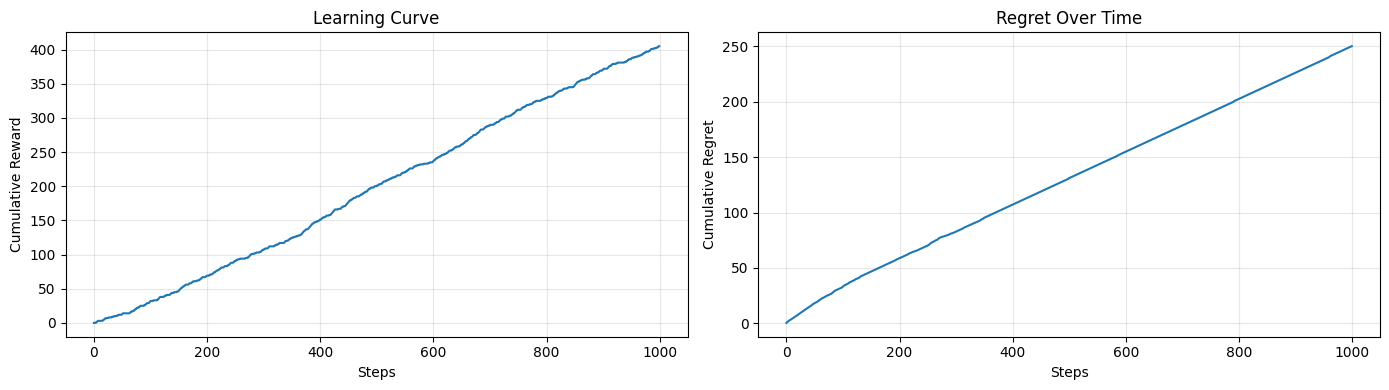

✓ Visualization working!


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot cumulative reward
axes[0].plot(results['cumulative_rewards'])
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Cumulative Reward')
axes[0].set_title('Learning Curve')
axes[0].grid(alpha=0.3)

# Plot cumulative regret
axes[1].plot(results['regrets'])
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('Cumulative Regret')
axes[1].set_title('Regret Over Time')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization working!")

## 4. Compare Estimated vs True Rewards

In [5]:
# Get top 10 items by estimated Q-value
top_items = bandit.get_top_items(k=10)

# Compare with true rewards
comparison = pd.DataFrame({
    'Item': top_items,
    'Estimated Q': [bandit.Q[i] for i in top_items],
    'True Reward': [results['true_rewards'][i] for i in top_items],
    'Times Pulled': [int(bandit.N[i]) for i in top_items]
})

print("Top 10 Items by Estimated Q-value:")
print(comparison.to_string(index=False))

# Find the actual best item
best_item = results['optimal_item']
print(f"\nOptimal item: {best_item}")
print(f"  True reward: {results['true_rewards'][best_item]:.4f}")
print(f"  Estimated Q: {bandit.Q[best_item]:.4f}")
print(f"  Rank in top items: {list(top_items).index(best_item) + 1 if best_item in top_items else 'Not in top 10'}")

Top 10 Items by Estimated Q-value:
 Item  Estimated Q  True Reward  Times Pulled
    2     0.426914     0.415959           862
   48     0.386364     0.484590            44
   14     0.375000     0.134376             8
   27     0.333333     0.202097             6
   23     0.314286     0.305502            35
   35     0.285714     0.211003             7
    1     0.250000     0.248558             4
   31     0.250000     0.207729             4
   13     0.000000     0.273321             1
   20     0.000000     0.263408             1

Optimal item: 37
  True reward: 0.6522
  Estimated Q: 0.0000
  Rank in top items: Not in top 10


## 5. Next Steps

Everything is working! Here's what to do next:

1. **Get real data**: Follow `docs/DATASETS.md` to download RetailRocket dataset
2. **Explore data**: Create `01_data_exploration.ipynb` notebook
3. **Implement UCB**: Better than epsilon-greedy!
4. **Read theory**: Check out `docs/THEORY.md` for RL concepts
5. **Follow roadmap**: See `docs/GETTING_STARTED.md` for day-by-day plan

Good luck with your project!